In [1]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, IncrementalPCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import LeaveOneOut
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1=pd.read_csv('/content/MyDrive/MyDrive/Dataset/signal-data.csv') #importing the dataset

In [4]:
df1.head()  #Showing the first 5 datapoints

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [5]:
df1.drop('Time',axis=1,inplace= True) #dropping the time column

In [6]:
df1.shape #checking the no of rows and columns in dataset

(1567, 591)

In [7]:
df1.describe().T  #Statistical summary/five point summary

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


There are many columns but only few of them affect the target variable. So we need to find that columns. The data looks to be spread across different units and range, so there is a need to standardize the data.

In [8]:
df=df1.copy(deep = True) #copying the data 

In [9]:
df.dtypes #checking the datatype of the feature columns 

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 591, dtype: object

In [10]:
df.isnull().sum()   #checking for the null values

0             6
1             7
2            14
3            14
4            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 591, dtype: int64

In [11]:
null_percentage = df.isnull().sum()/df.shape[0]*100     #percentage pf null values
null_percentage

0            0.382897
1            0.446713
2            0.893427
3            0.893427
4            0.893427
               ...   
586          0.063816
587          0.063816
588          0.063816
589          0.063816
Pass/Fail    0.000000
Length: 591, dtype: float64

In [12]:
col_to_drop=null_percentage[null_percentage>20].keys()  #removing feature columns with more than 20% null values
df.drop(col_to_drop, axis=1,inplace=True)

In [13]:
meanFiller = lambda x: x.fillna(x.mean())          #imputing the remaining null values with mean
df = df.apply(meanFiller,axis=0).astype('float64')

In [14]:
nunique = df.nunique()          #check for columns with unique values
cols_to_drop = nunique[nunique == 1].index                 #identifying columns with same value in all the rows and removing them
df.drop(cols_to_drop, axis=1,inplace=True)

###Splitting the data into 2 parts: 
*One which can be used for the analysis
<br>*The other which is used as a test set and only introduced to the model in the final stage

In [15]:
df2=df.iloc[1067:]   #df2 is used as final test data

In [16]:
df2.shape

(500, 443)

In [17]:
df3=df.iloc[:1067] #df3 is used for the analysis

In [18]:
df3.shape

(1067, 443)

In [19]:
#Check for multicollinearity
df3.corr()

,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.130168,-0.004716,0.015454,-0.001126,-0.026043,-0.005775,-0.035774,0.018115,0.025187,...,0.005440,-0.050228,0.033706,0.032435,0.034115,-0.007609,-0.022414,-0.019326,0.009946,-0.084443
1,-0.130168,1.000000,0.016908,-0.042500,0.047528,-0.027768,0.003461,0.008876,0.016974,-0.010339,...,0.022082,0.043787,0.001904,-0.002470,0.001307,-0.061679,0.016024,0.014544,0.081880,-0.008528
2,-0.004716,0.016908,1.000000,0.322375,-0.116455,-0.046796,-0.402738,0.054014,-0.001046,0.079594,...,-0.054926,0.003643,0.021985,0.024776,0.021936,-0.078376,-0.043903,-0.049014,-0.033392,0.029296
3,0.015454,-0.042500,0.322375,1.000000,0.209659,-0.625737,0.300585,-0.015670,0.077685,0.053216,...,-0.011673,-0.019678,0.040773,0.042316,0.041701,0.036561,-0.063958,-0.062934,-0.089888,0.000085
4,-0.001126,0.047528,-0.116455,0.209659,1.000000,-0.231555,-0.020496,0.025065,0.021289,0.010807,...,0.011405,0.052282,0.069473,0.066004,0.069191,0.045907,0.027964,0.038530,0.001322,-0.019832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,-0.007609,-0.061679,-0.078376,0.036561,0.045907,-0.055717,0.112193,0.007716,0.017273,0.038254,...,0.039183,-0.051659,0.013759,0.011837,0.014183,1.000000,0.143103,0.126619,-0.515721,0.006205
587,-0.022414,0.016024,-0.043903,-0.063958,0.027964,0.051978,0.018746,0.046636,0.050022,0.090500,...,-0.002235,-0.028070,-0.007707,-0.009729,-0.007958,0.143103,1.000000,0.972582,0.362210,0.071250
588,-0.019326,0.014544,-0.049014,-0.062934,0.038530,0.051794,0.006873,0.048464,0.049652,0.083476,...,-0.010652,-0.018143,-0.008518,-0.010367,-0.008737,0.126619,0.972582,1.000000,0.384531,0.074054
589,0.009946,0.081880,-0.033392,-0.089888,0.001322,0.049356,-0.068841,-0.006067,-0.010133,0.042928,...,-0.039931,0.044278,-0.006564,-0.008817,-0.007439,-0.515721,0.362210,0.384531,1.000000,0.033630


We can see multiple columns are showing higher correlation with each other which is leading to multicollinearity. So we select only the columns having higher correlation with the target variable in the next steps.

## Removing the columns except the one having a higher correlation with the target variable which will have an actual effect on the target value

In [20]:
correlation_values=df3.corr()['Pass/Fail']         #finding features highly correlated with target variable
corr_values=correlation_values.abs().sort_values(ascending=False)
corr_values

Pass/Fail    1.000000
59           0.181046
431          0.131128
21           0.126313
430          0.125996
               ...   
568          0.000353
456          0.000199
472          0.000187
3            0.000085
317          0.000057
Name: Pass/Fail, Length: 443, dtype: float64

In [21]:
corr_values[corr_values>0.107]    

Pass/Fail    1.000000
59           0.181046
431          0.131128
21           0.126313
430          0.125996
434          0.123460
435          0.121419
436          0.121183
437          0.114876
103          0.113151
28           0.112291
298          0.109427
122          0.109174
163          0.109152
510          0.107235
Name: Pass/Fail, dtype: float64

In [22]:
df3=df3[corr_values[corr_values>0.107].keys()] #retaining the columns with higher correlation with target variable

In [23]:
df3.shape

(1067, 15)

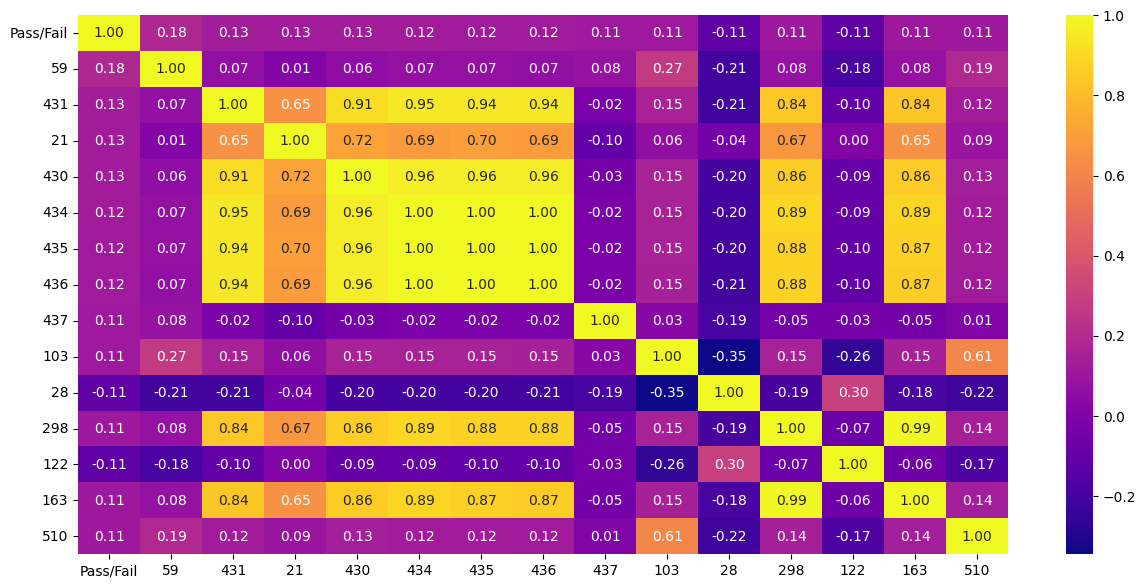

In [24]:
plt.figure(figsize = (15,7))
sns.heatmap(df3.corr(), cmap='plasma',annot=True, fmt='.2f'); 

Some of the attributes have strong correlation whereas some have no correlation and some have negative correlation

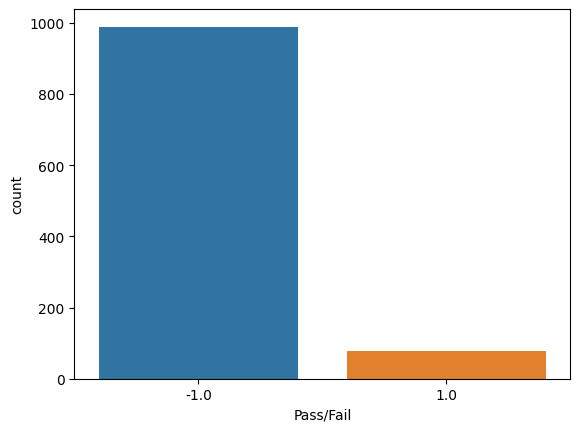

In [25]:
sns.countplot(data=df3,x='Pass/Fail');

We can see that the target variable is imbalanced. The class '1.0' is a minority class which is of interest to us.

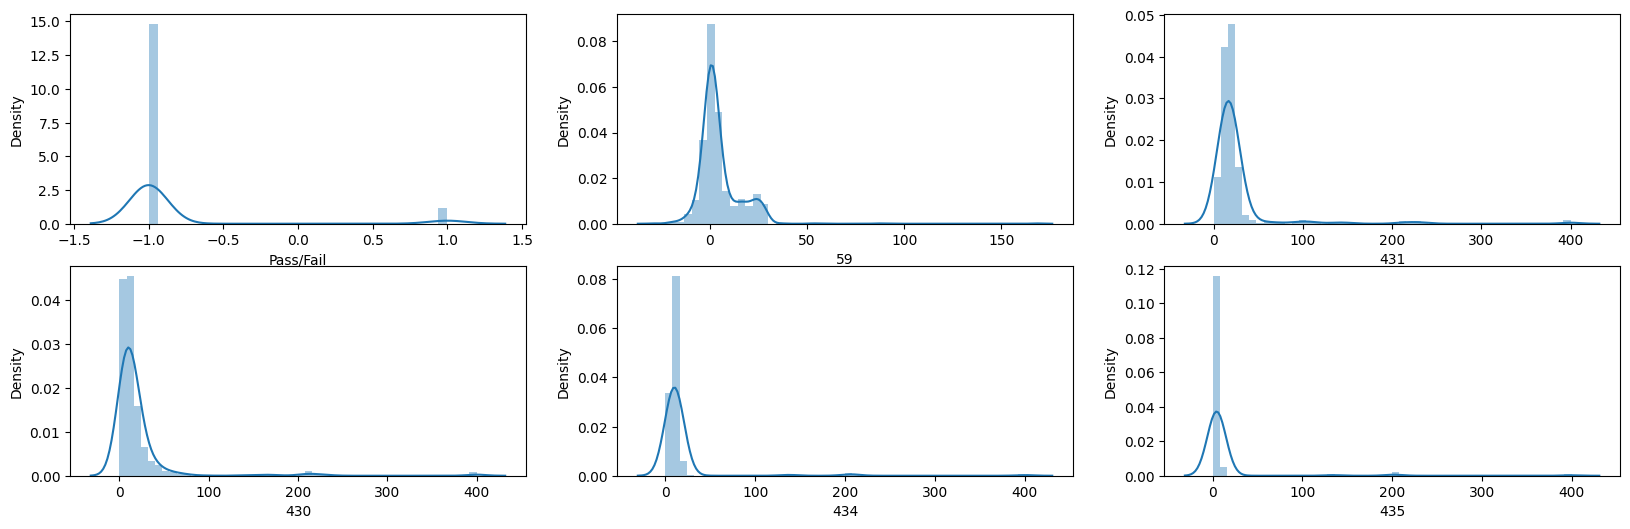

In [26]:
plt.figure(figsize=(20,6));

plt.subplot(2,3,1);
sns.distplot(df3['Pass/Fail']);

plt.subplot(2,3,2);
sns.distplot(df3['59']);

plt.subplot(2,3,3);
sns.distplot(df3['431']);

plt.subplot(2,3,4);
sns.distplot(df3['430']);

plt.subplot(2,3,5);
sns.distplot(df3['434']);

plt.subplot(2,3,6);
sns.distplot(df3['435']);


Shows few distribution plots of the feature columns.

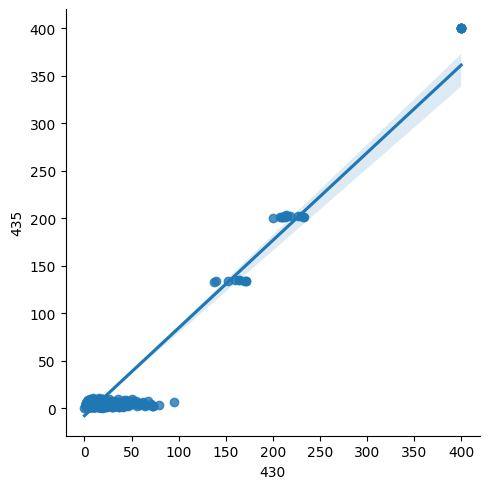

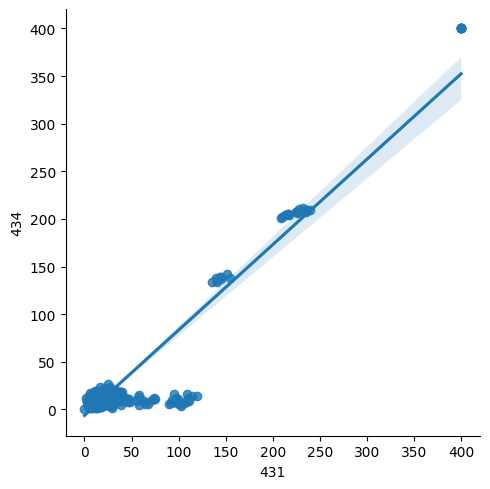

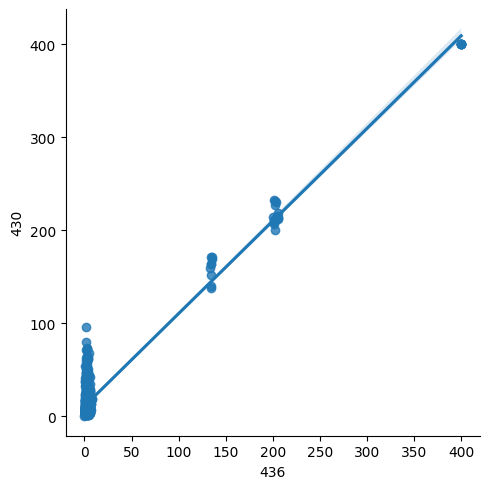

In [27]:
sns.lmplot(data=df3,x='430',y='435');
sns.lmplot(data=df3,x='431',y='434');
sns.lmplot(data=df3,x='436',y='430');

Shows few line plots of highly correlated feature columns.

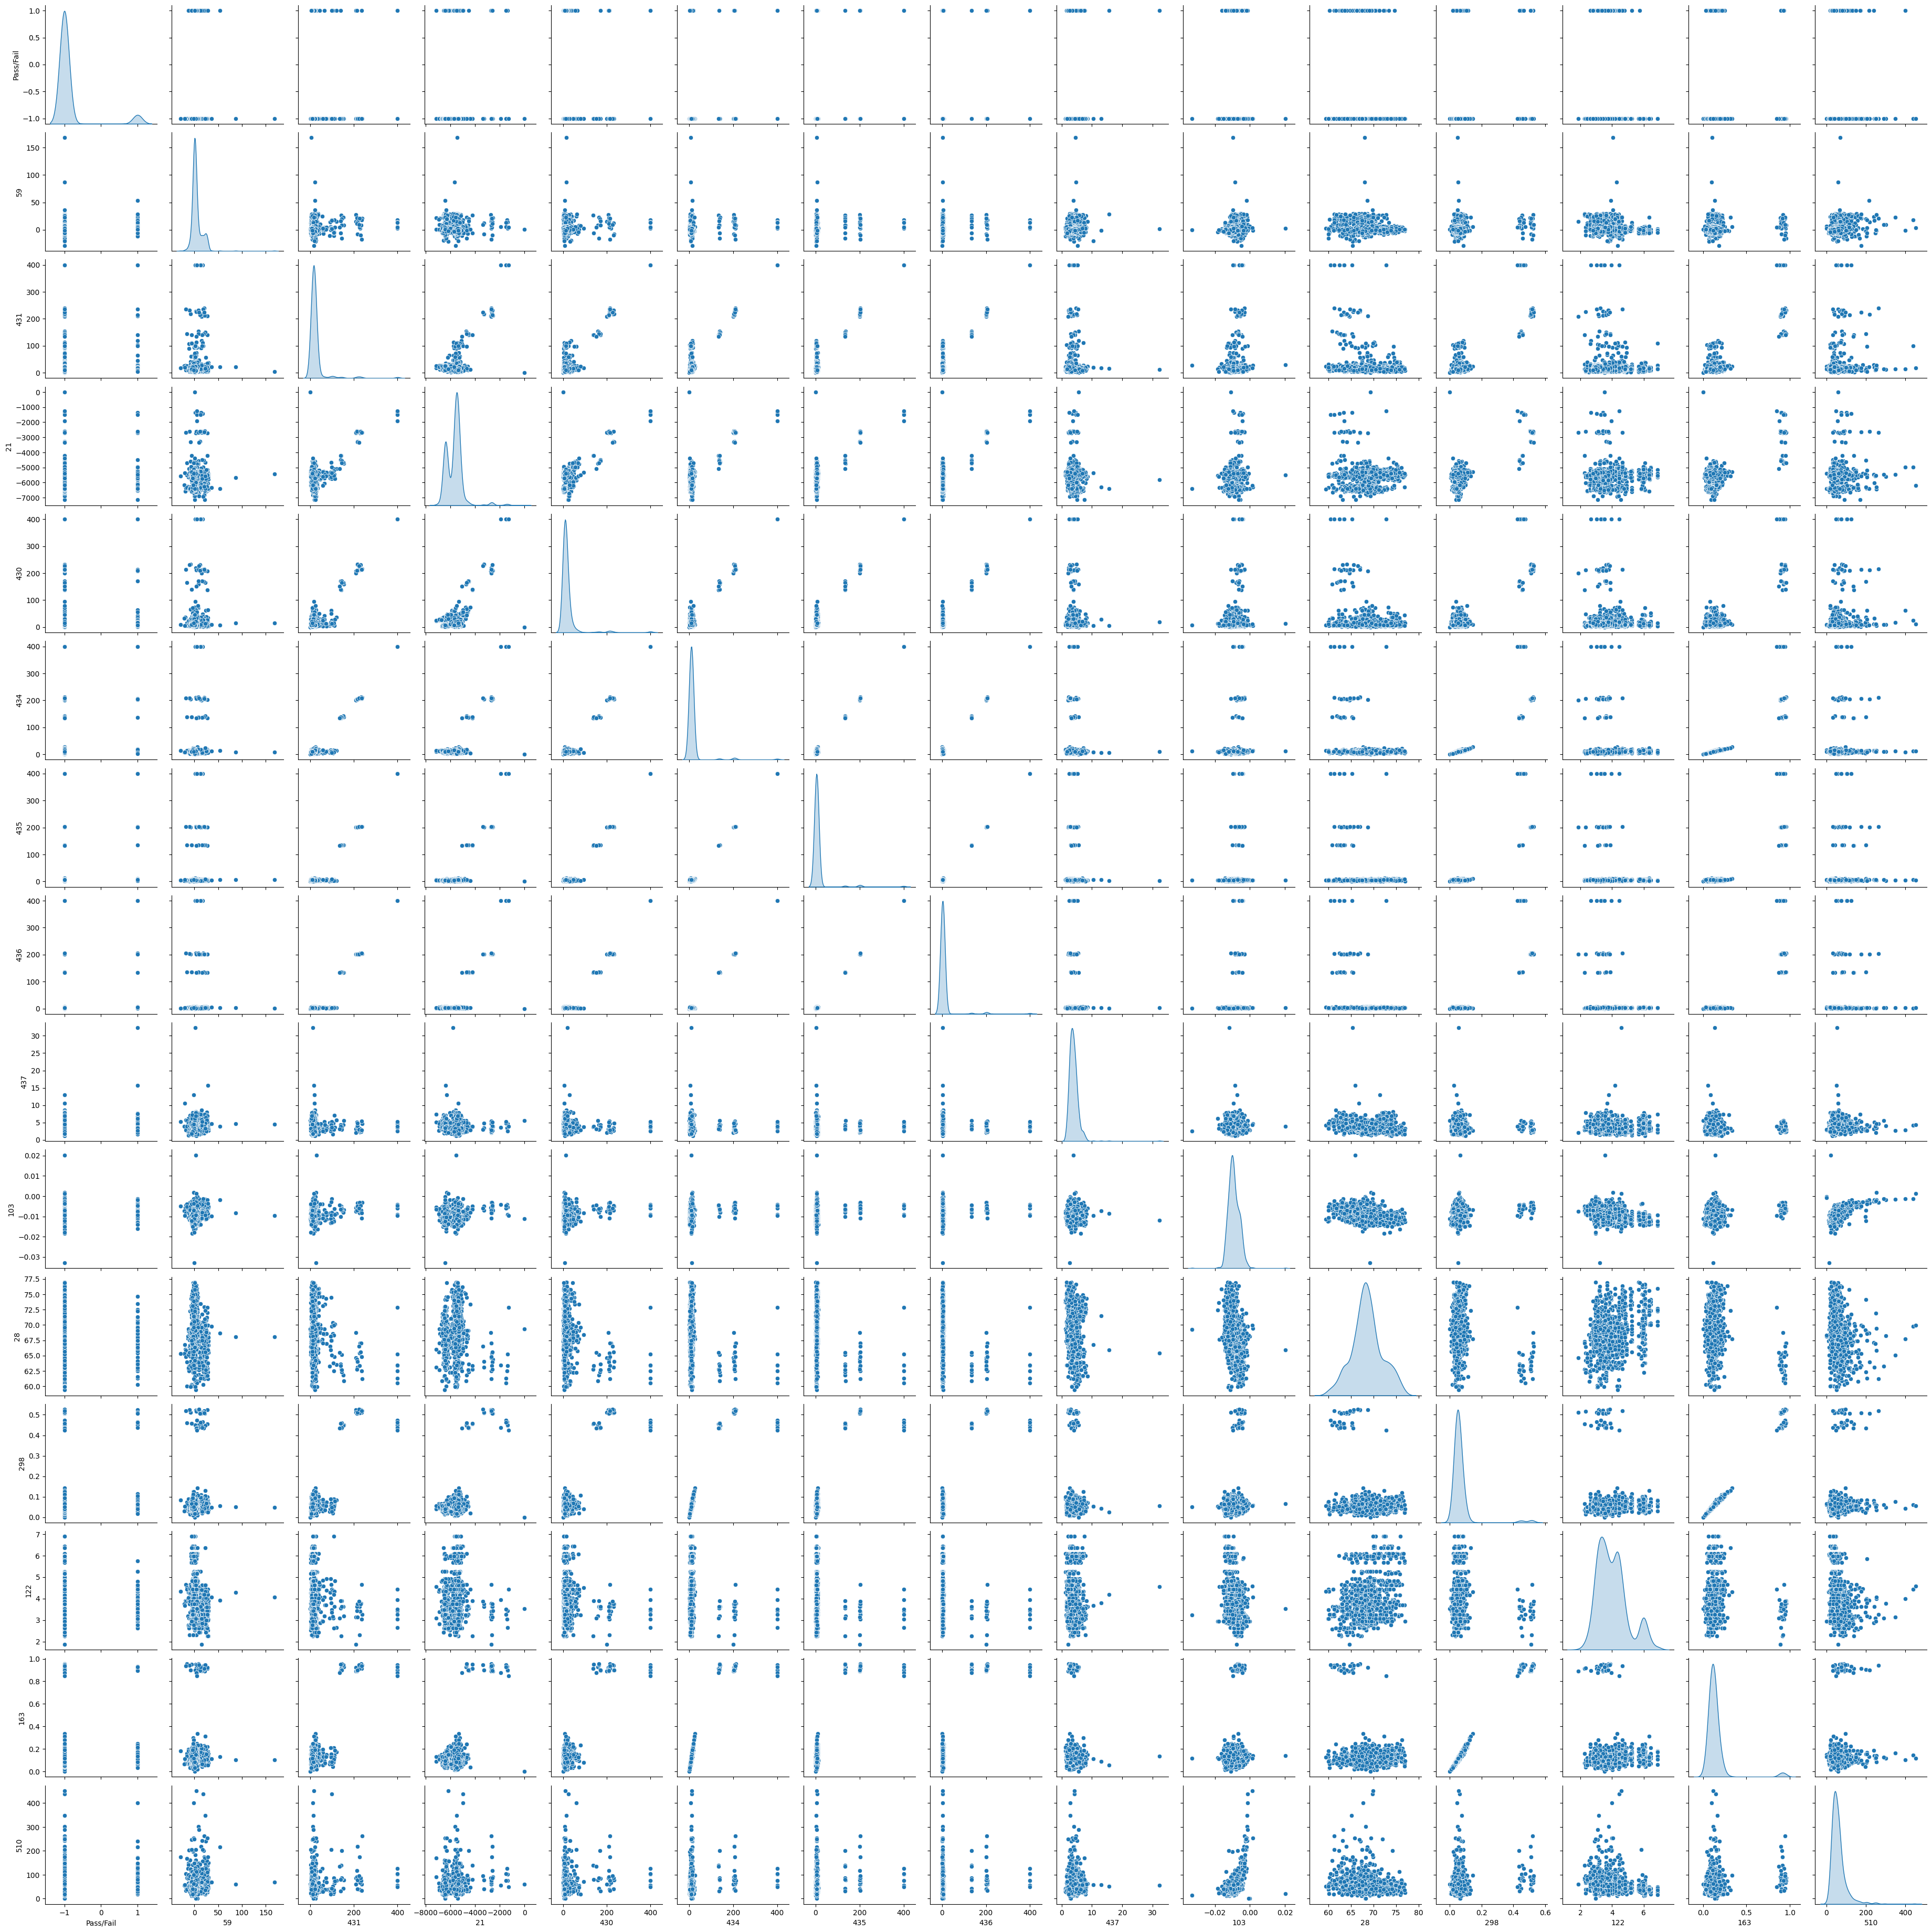

In [28]:
sns.pairplot(df3, diag_kind = 'kde', palette="Paired");

In [29]:
df3.groupby(["Pass/Fail"]).count()

,59,431,21,430,434,435,436,437,103,28,298,122,163,510
Pass/Fail,,,,,,,,,,,,,,
-1.0,989,989,989,989,989,989,989,989,989,989,989,989,989,989
1.0,78,78,78,78,78,78,78,78,78,78,78,78,78,78


In [30]:
x=df3.copy(deep=True)                      #seperating the x and y values
x.drop(['Pass/Fail'],axis=1,inplace=True)
y=df3[['Pass/Fail']]
y.value_counts()

Pass/Fail
-1.0         989
 1.0          78
dtype: int64

Target variable counts before oversampling

In [31]:
x=x.to_numpy()   # converting the dataframes to array
y=y.to_numpy()

In [32]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x, y = sm.fit_resample(x, y.ravel())

In [33]:
x=pd.DataFrame(x,columns=['59','431','21','430','434','435','436','437','103','28','298','122','163','510'])
y=pd.DataFrame(y)
y.value_counts()

-1.0    989
 1.0    989
dtype: int64

Target variable counts after oversampling

In [34]:
x=x.apply(zscore) #Standardizing the data

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1) #Splitting data into train and test data of 70:30 ratio
print('X Train set contains {} data'.format(x_train.shape))
print('X Test set contains {} data'.format(x_test.shape))
print('Y Train set contains {} data'.format(y_train.shape))
print('Y Test set contains {} data'.format(y_test.shape))

X Train set contains (1384, 14) data
X Test set contains (594, 14) data
Y Train set contains (1384, 1) data
Y Test set contains (594, 1) data


##Logistic Regression model

In [36]:
logi_model=LogisticRegression()            #training the model
logi_model.fit(x_train,y_train)
logi_y_pred=logi_model.predict(x_test)
logi_model_train_data_score = logi_model.score(x_train,y_train)
print('The score of the Logistic Regression model on training data is {}'.format(np.round(logi_model_train_data_score,3)))

The score of the Logistic Regression model on training data is 0.749


In [37]:
logi_model_score =accuracy_score(y_test,logi_y_pred)          #Score of predicted values
print('The score of the Logistic Regression model on test data is {}'.format(np.round(logi_model_score,2)))

The score of the Logistic Regression model on test data is 0.74


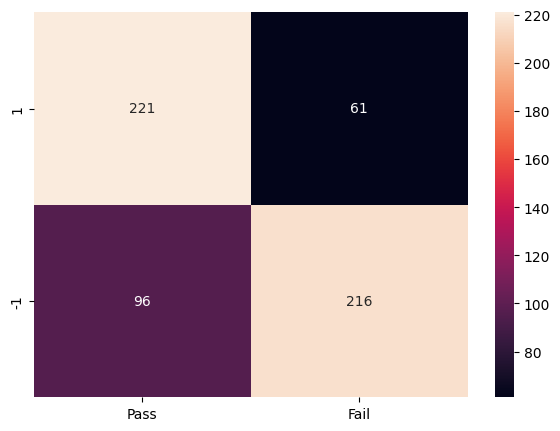

In [38]:
cm=confusion_matrix(y_test,logi_y_pred)      #Confusion matrix
logi_cm_df=pd.DataFrame(cm,index= [i for i in ['1','-1']],columns=[i for i in ['Pass','Fail']])
plt.figure(figsize=(7,5))
sns.heatmap(logi_cm_df,annot=True,fmt='g');

In [39]:
print(classification_report(y_test,logi_y_pred))   #classification report

              precision    recall  f1-score   support

        -1.0       0.70      0.78      0.74       282
         1.0       0.78      0.69      0.73       312

    accuracy                           0.74       594
   macro avg       0.74      0.74      0.74       594
weighted avg       0.74      0.74      0.74       594



In [40]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],       #Grid search cv
              'penalty' :['l2'],
              'C' : [100, 10, 1.0, 0.1, 0.01]}

grid = GridSearchCV(logi_model,param_grid,refit= True, verbose =0)

grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [41]:
print(grid.best_params_)             #Selecting best parameters
print(grid.best_estimator_)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=100, solver='newton-cg')


In [42]:
grid_y_pred = grid.predict(x_test)
logi_score=accuracy_score(y_test,grid_y_pred)
print('Accuracy score for Logistic Regression Model is %1.2f'%accuracy_score(y_test,grid_y_pred))

Accuracy score for Logistic Regression Model is 0.75


##KNN model

In [43]:
knn=KNeighborsClassifier()     #Training the KNN model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
knn_y_pred = knn.predict(x_test)
knn_score = accuracy_score(y_test,knn_y_pred)
print('The score of the K-nearest neighbour model on test data is {}'.format(np.round(knn_score,3)))

The score of the K-nearest neighbour model on test data is 0.874


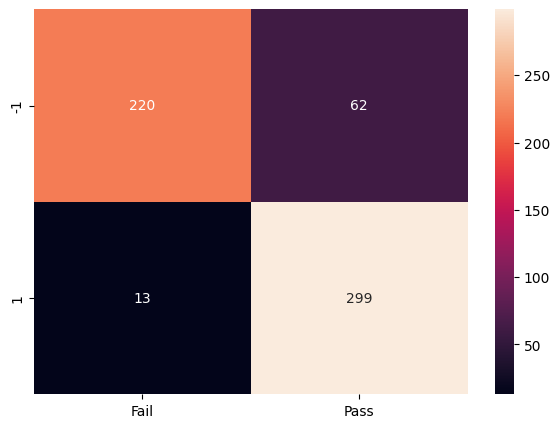

In [45]:
cm = confusion_matrix(y_test,knn_y_pred)        #Confusion matrix
cm_df = pd.DataFrame(cm, index = [i for i in ['-1','1']],columns=[i for i in ['Fail','Pass']])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df,annot=True,fmt='g');

In [46]:
print(classification_report(y_test,knn_y_pred))   #classification report

              precision    recall  f1-score   support

        -1.0       0.94      0.78      0.85       282
         1.0       0.83      0.96      0.89       312

    accuracy                           0.87       594
   macro avg       0.89      0.87      0.87       594
weighted avg       0.88      0.87      0.87       594



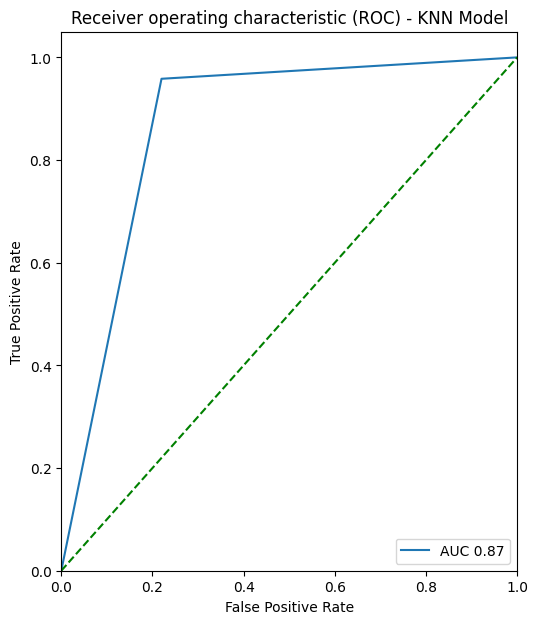

In [47]:
plt.figure(figsize=(20,7))        #Plotting the ROC curve

knn_fpr,knn_tpr,knn_threshold = roc_curve(y_test,knn_y_pred)
knn_auc = roc_auc_score(y_test,knn_y_pred)

plt.subplot(1,3,3);
plt.plot(knn_fpr,knn_tpr,label='AUC %1.2f'%knn_auc);
plt.plot([0,1],[0,1],'g--');
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) - KNN Model')
plt.legend(loc="lower right");

##Cross-Validation

In [48]:
num_folds = 60       #K-Fold cross validation

kfold = KFold(n_splits=num_folds)
model = KNeighborsClassifier()
results = cross_val_score(model, x,y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.63636364 0.60606061 0.63636364 0.3030303  0.51515152 0.63636364
 0.51515152 0.66666667 0.48484848 0.51515152 0.84848485 0.75757576
 0.87878788 0.75757576 0.90909091 0.75757576 0.60606061 0.63636364
 0.78787879 0.87878788 0.93939394 0.81818182 0.87878788 0.75757576
 0.63636364 0.75757576 0.96969697 0.96969697 0.93939394 0.96969697
 0.87878788 0.87878788 0.87878788 1.         0.96969697 1.
 0.96969697 1.         1.         1.         0.96969697 1.
 0.90909091 0.96969697 1.         0.96969697 1.         1.
 0.96969697 0.96969697 1.         0.96969697 1.         0.96969697
 1.         0.96969697 1.         0.96969697 1.         1.        ]
Accuracy: 85.303% (17.140%)


In [49]:
loocv = LeaveOneOut()     #Leave one out Cross-validation
model = KNeighborsClassifier()
results = cross_val_score(model, x,y, cv=loocv)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1. 0. 1. ... 1. 1. 1.]
Accuracy: 86.552% (34.117%)


##Hyperparameter tuning

**Grid search cv**

In [50]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }      #Hyperparameter tuning using grid search cv

In [51]:
gs = GridSearchCV(knn,param_grid,cv=10)

In [52]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [53]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [54]:
gs.best_params_       #The best combination of hyperparamter

{'algorithm': 'auto', 'n_neighbors': 2}

In [55]:
gs.cv_results_['mean_test_score']

array([0.87646231, 0.88223856, 0.84681472, 0.86560838, 0.84248775,
       0.85260661, 0.8388802 , 0.84320717, 0.87646231, 0.88223856,
       0.84681472, 0.86560838, 0.84248775, 0.85260661, 0.8388802 ,
       0.84320717, 0.87646231, 0.88223856, 0.84681472, 0.86560838,
       0.84248775, 0.85260661, 0.8388802 , 0.84320717, 0.87646231,
       0.88223856, 0.84681472, 0.86560838, 0.84248775, 0.85260661,
       0.8388802 , 0.84320717])

In [56]:
print("The cross-validation score in training data: {}" .format(np.round(gs.best_score_,3)))

The cross-validation score in training data: 0.882


In [57]:
print("The cross-validation score in test data: {}" .format(np.round(gs.score(x_test, y_test),3)))

The cross-validation score in test data: 0.879


##PCA

In [58]:
x=df[['59','431','21','430','434','435','436','437','103','28','298','122','163','510']]
y=df[['Pass/Fail']]

In [59]:
x=x.apply(zscore) #standardize the data

In [60]:
covMatrix = np.cov(x,rowvar=False) #Finding the covariance matrix

In [61]:
pca = PCA(n_components=14)
pca.fit(x)

PCA(n_components=14)

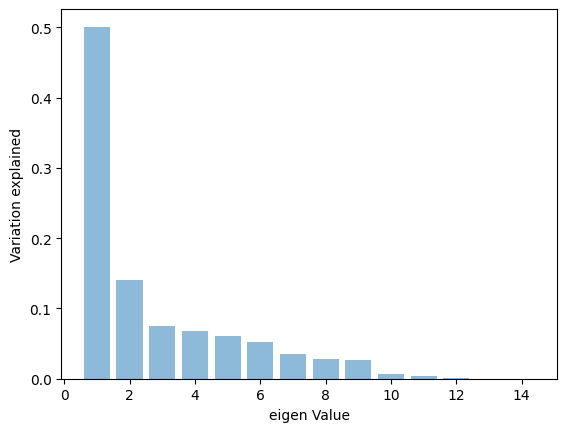

In [62]:
plt.bar(list(range(1,15)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

We can clearly see that most of the variance in the target variable is explained by the 9 features.

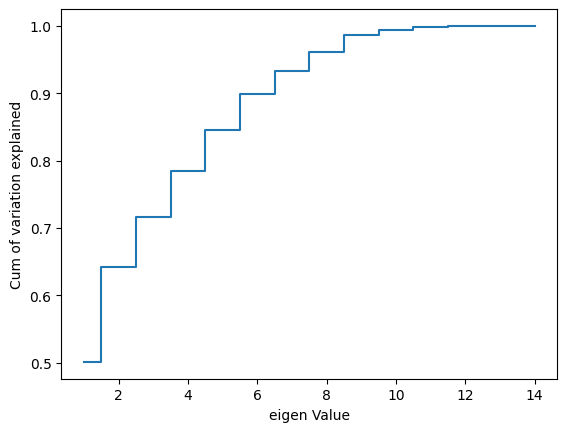

In [63]:
plt.step(list(range(1,15)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

The elbow point is close to 9

In [64]:
pca3 = PCA(n_components=9)
pca3.fit(x)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
xpca = pca3.transform(x)

[[ 4.56070911e-02  3.54676126e-01  2.64951572e-01  3.61594951e-01
   3.70757931e-01  3.68542028e-01  3.68186531e-01 -1.20931804e-02
   7.85350430e-02 -8.72191232e-02  3.50499728e-01 -3.00890568e-02
   3.45597824e-01  7.22091645e-02]
 [ 3.98244092e-01 -1.70289183e-02 -1.51345856e-01 -4.58718645e-02
  -4.32347800e-02 -4.47186498e-02 -4.26617194e-02  3.82854527e-02
   5.68071348e-01 -4.14296662e-01 -4.14279671e-02 -1.97691045e-01
  -4.79092556e-02  5.21063295e-01]
 [ 1.75528060e-01  4.60195550e-02 -1.07421154e-01  3.98060678e-03
   2.78106230e-02  2.89562424e-02  3.31531550e-02  7.83581395e-01
  -2.14603676e-01 -2.28326520e-01 -1.86996277e-02 -3.80274719e-01
  -1.93201461e-02 -3.08685242e-01]
 [ 3.41919955e-02  1.98930033e-02 -4.61942901e-02  2.58863860e-04
   8.72825197e-03 -1.54189147e-03 -5.98735615e-04  4.91484691e-01
   1.17586606e-01  2.23332361e-02  1.83155081e-02  8.48275626e-01
   2.51253717e-02  1.40717496e-01]
 [ 6.54896700e-01  1.80822279e-02 -1.48827369e-01 -1.03469072e-02
  

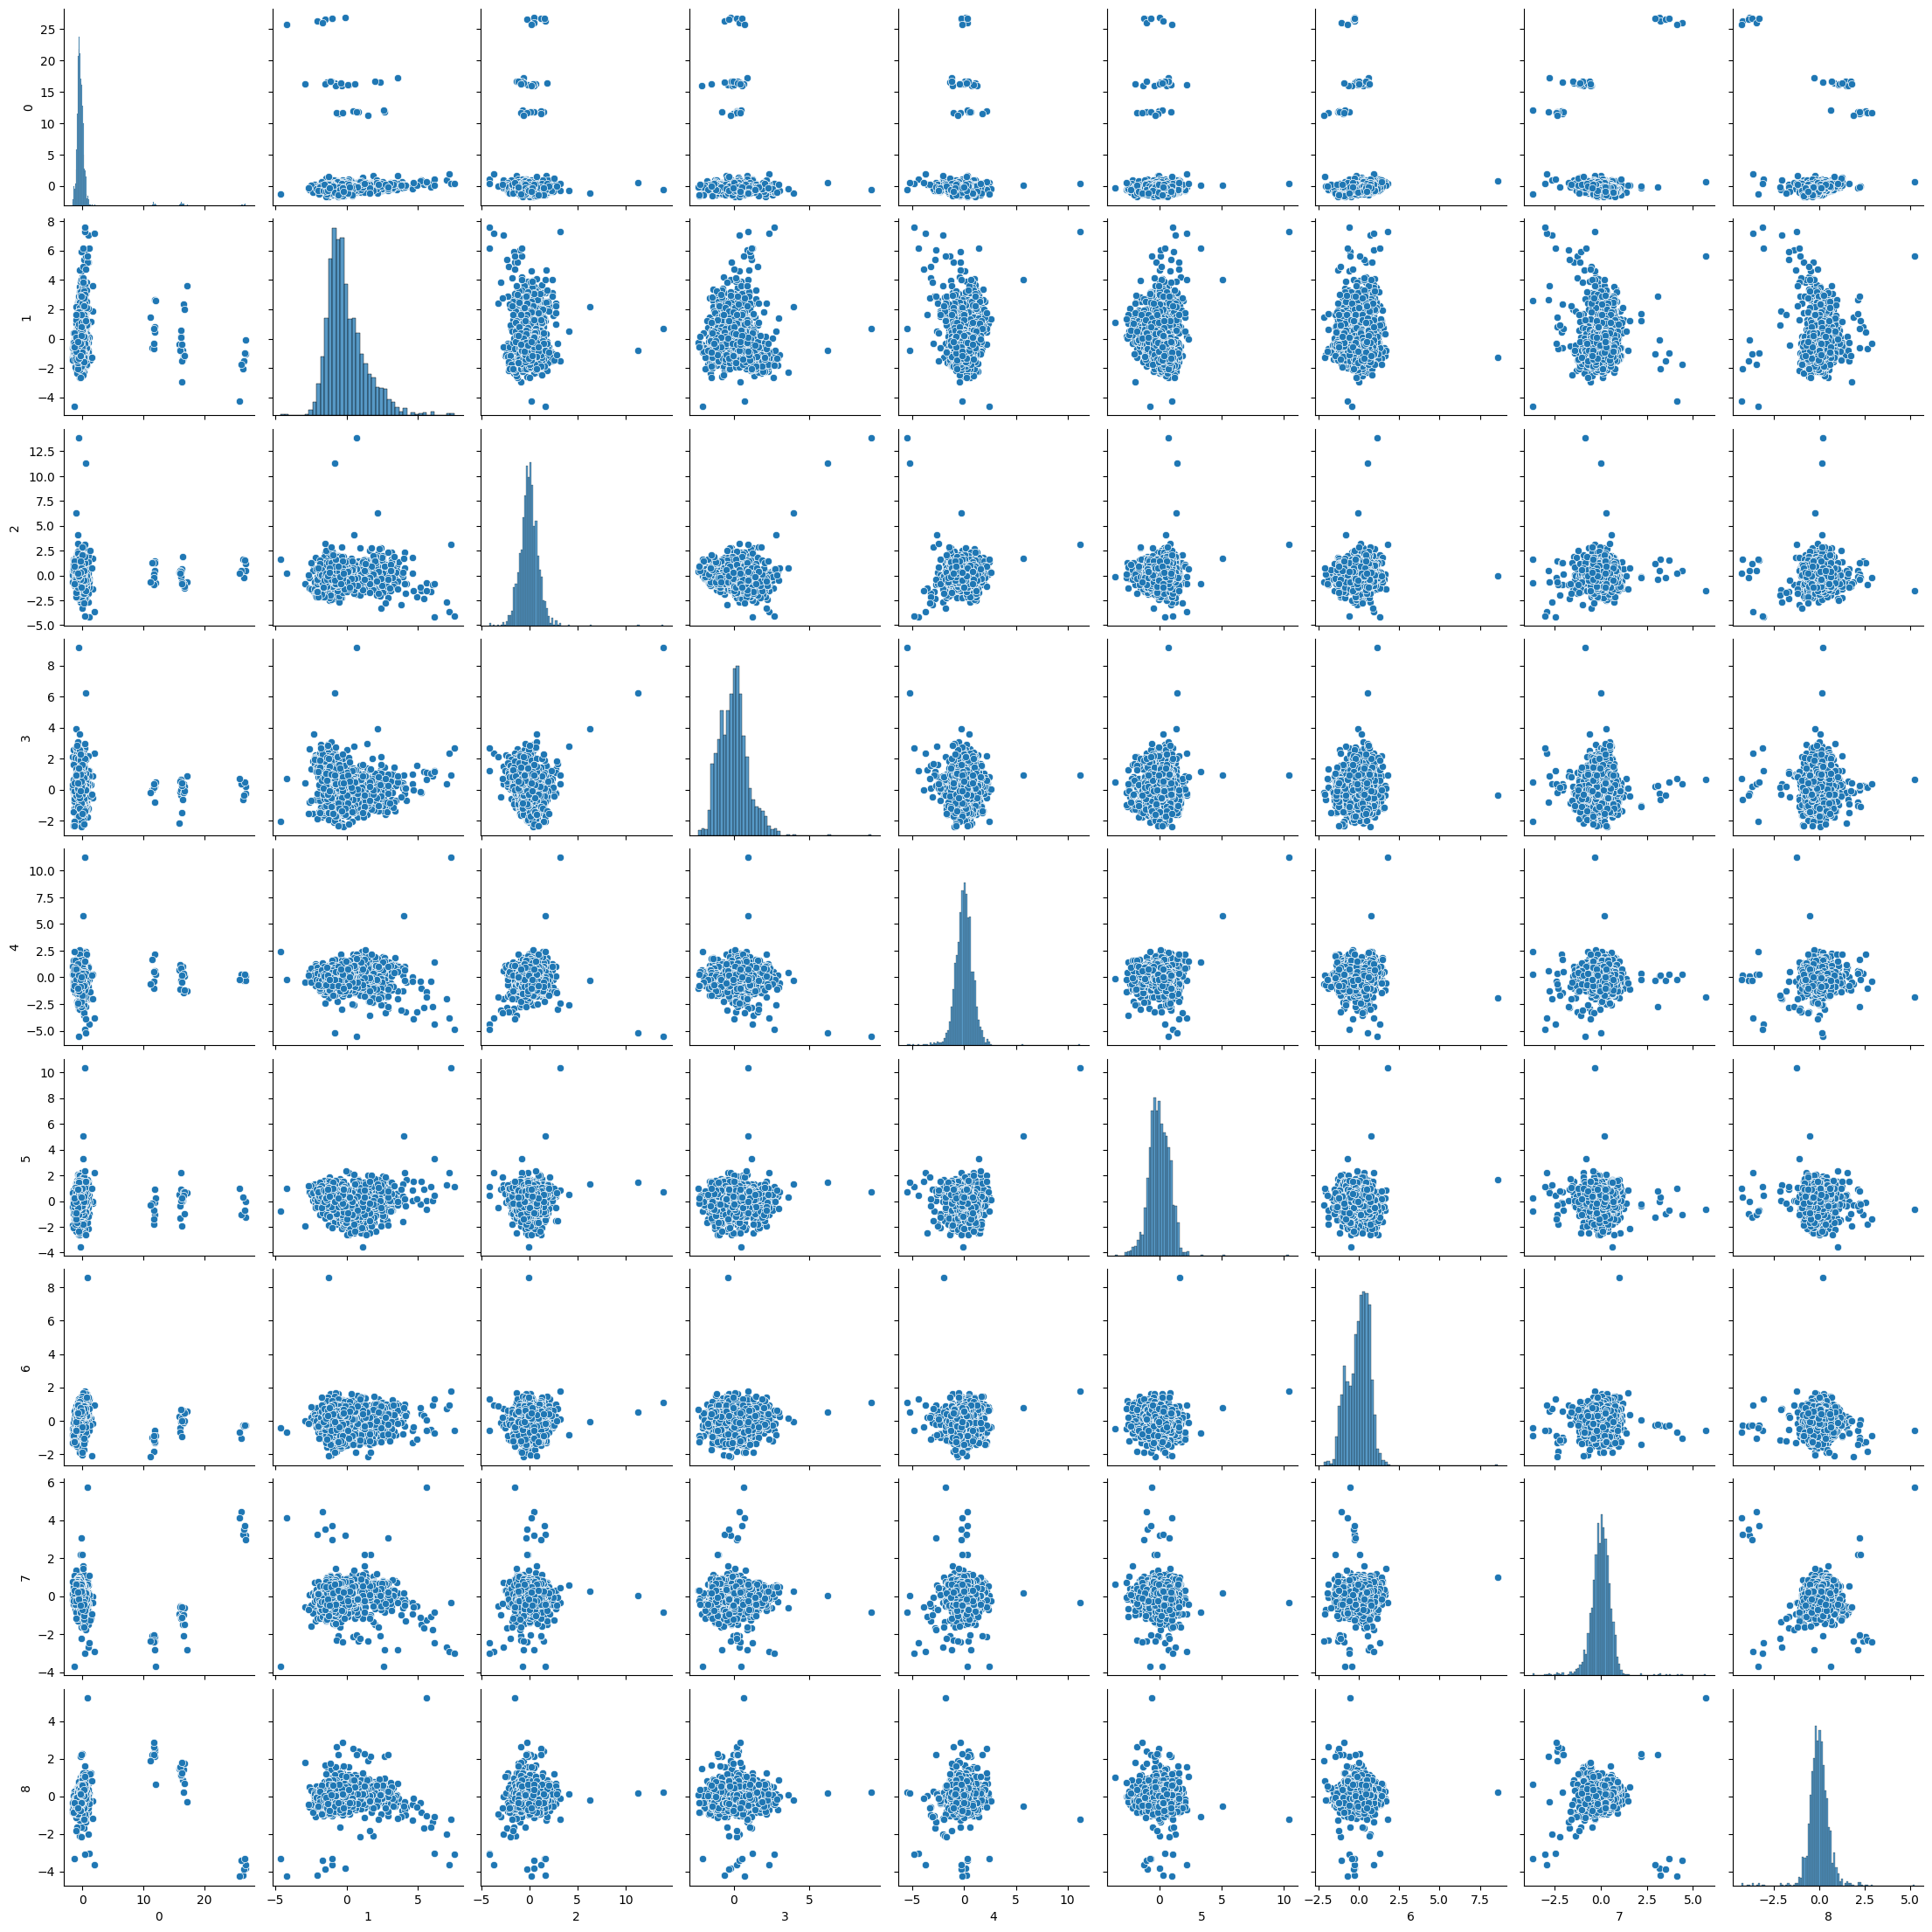

In [65]:
sns.pairplot(pd.DataFrame(xpca));

In [66]:
y.value_counts()

Pass/Fail
-1.0         1463
 1.0          104
dtype: int64

In [67]:
y=y.to_numpy()

In [68]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x_res, y_res = sm.fit_resample(xpca, y.ravel())

In [69]:
print(f"Shape of x and y on resampling is {x_res.shape} and {y_res.shape} ")

Shape of x and y on resampling is (2926, 9) and (2926,) 


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=5)   #splitting the data into train and test data in 70:30 percentage

In [71]:
num_folds = 60       #K-Fold cross validation 

kfold = KFold(n_splits=num_folds)
model = KNeighborsClassifier()
results = cross_val_score(model, x_res,y_res, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.53061224 0.65306122 0.26530612 0.57142857 0.63265306 0.55102041
 0.6122449  0.75510204 0.81632653 0.83673469 0.7755102  0.71428571
 0.83673469 0.87755102 0.85714286 0.7755102  0.59183673 0.93877551
 0.91836735 0.93877551 0.89795918 0.7755102  0.7755102  0.87755102
 0.75510204 0.71428571 0.71428571 0.7755102  0.85714286 0.81632653
 0.91836735 0.91836735 0.97959184 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.97959184 0.97959184 1.         1.
 0.97916667 1.         1.         0.95833333 1.         1.
 0.97916667 1.         1.         1.         1.         1.        ]
Accuracy: 86.834% (15.957%)


We can see that upon dimensionality reduction the accuracy score has reduced but the PCA helps in reducing the computation time and avoids overfitting the training data.

In [72]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }      #Grid search cv
gs = GridSearchCV(knn,param_grid,cv=10)

 
gs.fit( x_train, y_train) 

print("The cross-validation score in training data: {}" .format(np.round(gs.best_score_,3)))
print(" Best parameters: ", gs.best_params_) 
print("The cross-validation score in test data: {}" .format(np.round(gs.score(x_test, y_test),3)))

The cross-validation score in training data: 0.912
 Best parameters:  {'algorithm': 'auto', 'n_neighbors': 2}
The cross-validation score in test data: 0.932


The model is performing very well in the test data.

##Testing the model with test data that was initially seperated from the original data

In [73]:
x=df2.copy(deep=True) 
x.drop(['Pass/Fail'],axis=1,inplace=True)                     #Passing the data that was initially seperated out as test data
x=x[['59','103','510','348','431','434','430','21','435','28','436','210','129','298','163']]
y=df2[['Pass/Fail']]

In [74]:
num_folds = 60       #K-Fold cross validation


kfold = KFold(n_splits=num_folds)
model = KNeighborsClassifier(algorithm='auto',n_neighbors=2)      #Using the best hyperparameters
knn_results = cross_val_score(model, x,y, cv=kfold)

In [75]:
print(knn_results)
print("Accuracy: %.3f%% (%.3f%%)" % (knn_results.mean()*100.0, knn_results.std()*100.0))

[1.         1.         1.         1.         1.         1.
 0.88888889 1.         0.88888889 0.88888889 1.         1.
 1.         0.77777778 1.         1.         0.88888889 0.88888889
 1.         0.66666667 0.875      1.         1.         1.
 1.         0.875      0.875      0.875      1.         0.75
 0.625      0.875      0.875      1.         0.625      1.
 1.         1.         1.         0.875      1.         1.
 1.         0.875      0.875      1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.875      1.         1.         1.         1.         1.        ]
Accuracy: 94.398% (9.433%)


The model is performing well in the test data.

##Random forest classifier

In [76]:
clf = RandomForestClassifier(n_estimators=50)

In [77]:
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

**Random search cv**

In [78]:
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples)    #Random search cv

In [79]:
randomCV.fit(x_train, y_train)

rf_results=np.round(randomCV.score(x_test, y_test),3)
print("The cross-validation score in training data: {}" .format(np.round(randomCV.best_score_,3))) 
print("The best parameters: {}".format(randomCV.best_params_))
print("The cross-validation score in test data: {}" .format(np.round(randomCV.score(x_test, y_test),3)))

The cross-validation score in training data: 0.884
The best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}
The cross-validation score in test data: 0.899


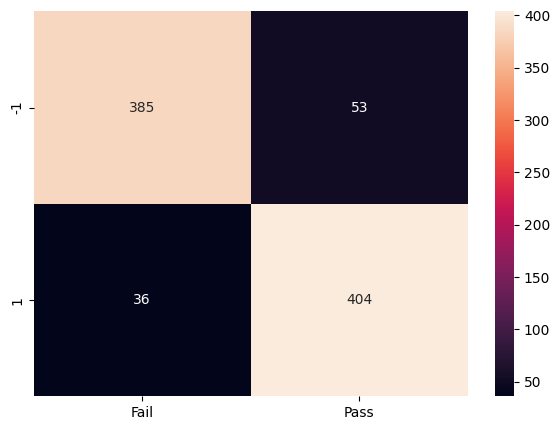

In [80]:
rf_y_pred=randomCV.predict(x_test)    #Confusion matrix
cm = confusion_matrix(y_test,rf_y_pred)
cm_df = pd.DataFrame(cm, index = [i for i in ['-1','1']],columns=[i for i in ['Fail','Pass']])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df,annot=True,fmt='g');

In [81]:
print(classification_report(y_test,rf_y_pred))   #classification report

              precision    recall  f1-score   support

        -1.0       0.91      0.88      0.90       438
         1.0       0.88      0.92      0.90       440

    accuracy                           0.90       878
   macro avg       0.90      0.90      0.90       878
weighted avg       0.90      0.90      0.90       878



The Random forest classifier is also performing well with the test data.

##Decision Tree Classifier Model

In [82]:
dt = DecisionTreeClassifier()

In [83]:
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "criterion": ["gini", "entropy"]}

In [84]:
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=samples)    #Random search cv

In [85]:
randomCV.fit(x_train, y_train)

dt_results=np.round(randomCV.score(x_test, y_test),3)
print("The cross-validation score in training data: {}" .format(np.round(randomCV.best_score_,3))) 
print("The best parameters: {}".format(randomCV.best_params_))
print("The cross-validation score in test data: {}" .format(np.round(randomCV.score(x_test, y_test),3)))

The cross-validation score in training data: 0.808
The best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 9}
The cross-validation score in test data: 0.825


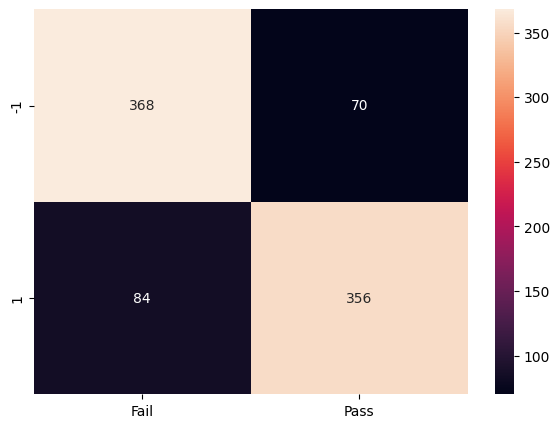

In [86]:
dt_y_pred=randomCV.predict(x_test)    #Confusion matrix
cm = confusion_matrix(y_test,dt_y_pred)
cm_df = pd.DataFrame(cm, index = [i for i in ['-1','1']],columns=[i for i in ['Fail','Pass']])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df,annot=True,fmt='g');

In [87]:
print(classification_report(y_test,dt_y_pred))   #classification report

              precision    recall  f1-score   support

        -1.0       0.81      0.84      0.83       438
         1.0       0.84      0.81      0.82       440

    accuracy                           0.82       878
   macro avg       0.82      0.82      0.82       878
weighted avg       0.82      0.82      0.82       878



##SVM Classifier

In [88]:
svm_model = svm.SVC(gamma = 0.025,C=3)        #Training the SVM model
svm_model.fit(x_train,y_train)
svm_y_pred = svm_model.predict(x_test)

In [89]:
print('Accuracy score for SVM Model is {}'.format(np.round(accuracy_score(y_test,svm_y_pred),2)))

Accuracy score for SVM Model is 0.76


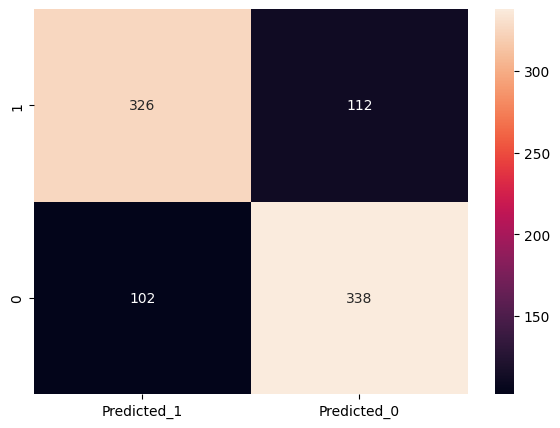

In [90]:
cm = confusion_matrix(y_test,svm_y_pred)      #Confusion matrix
cm_df = pd.DataFrame(cm, index= [i for i in ['1','0']],columns= [i for i in ['Predicted_1','Predicted_0']])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df,annot=True,fmt='g');

In [91]:
print(classification_report(y_test,svm_y_pred)) #Classification report 

              precision    recall  f1-score   support

        -1.0       0.76      0.74      0.75       438
         1.0       0.75      0.77      0.76       440

    accuracy                           0.76       878
   macro avg       0.76      0.76      0.76       878
weighted avg       0.76      0.76      0.76       878



In [92]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],                   #grid search cv
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(),param_grid,refit= True, verbose =0)

grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [93]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [94]:
grid_y_pred = grid.predict(x_test)
print('Accuracy score for SVM Model is %1.2f'%accuracy_score(y_test,grid_y_pred))

Accuracy score for SVM Model is 0.96


In [95]:
print(classification_report(y_test,grid_y_pred))

              precision    recall  f1-score   support

        -1.0       0.98      0.94      0.96       438
         1.0       0.94      0.98      0.96       440

    accuracy                           0.96       878
   macro avg       0.96      0.96      0.96       878
weighted avg       0.96      0.96      0.96       878



The performance of the SVM model significantly improved upon hyperparamter tuning.

In [96]:
num_folds = 60       #K-Fold cross validation


kfold = KFold(n_splits=num_folds)
model = svm.SVC(C=10, gamma=1, kernel='rbf')      #Using the best hyperparameters
svm_results = cross_val_score(model, x,y, cv=kfold)

In [97]:
print(svm_results)
print("Accuracy: %.3f%% (%.3f%%)" % (svm_results.mean()*100.0, svm_results.std()*100.0))

[1.         1.         1.         1.         1.         1.
 1.         1.         0.88888889 0.88888889 1.         1.
 1.         0.77777778 1.         1.         0.88888889 0.88888889
 1.         0.66666667 0.875      1.         1.         1.
 1.         1.         0.875      0.875      1.         0.75
 0.625      0.875      0.875      1.         0.625      1.
 1.         1.         1.         0.875      1.         1.
 1.         0.875      0.875      1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.875      1.         1.         1.         1.         1.        ]
Accuracy: 94.792% (9.412%)


In [98]:
print('Accuracy score of Logistic Regression model on validation data is {}'.format(np.round(logi_score,2)))
print("Accuracy score of KNN model on Test data: %.3f%% (%.3f%%)" % (knn_results.mean()*100.0, knn_results.std()*100.0))
print("Accuracy score of Random Forest model on validation data: %.3f%% " % (rf_results.mean()*100.0))
print("Accuracy score of Decision Tree model on validation data: %.3f%% " % (dt_results.mean()*100.0))
print("Accuracy score of SVM model on Test data: %.3f%% (%.3f%%)" % (svm_results.mean()*100.0, svm_results.std()*100.0))

Accuracy score of Logistic Regression model on validation data is 0.75
Accuracy score of KNN model on Test data: 94.398% (9.433%)
Accuracy score of Random Forest model on validation data: 89.900% 
Accuracy score of Decision Tree model on validation data: 82.500% 
Accuracy score of SVM model on Test data: 94.792% (9.412%)


The best models are K-nearest neighbour model and SVM model as they have a higher score on evaluating the test set. The other models are only tested with validaion test which shows a score less than the KNN and SVM model. Hence the KNN and SVM model has shown better performance improvement after hyperparameter tuning, dimensionality reduction and cross validation process.

In [99]:
import pickle
pickle.dump(model, open('KNN_model.pkl', 'wb'))

Initially we had a dataset with large number of feature columns. We did preprocessing and cleaned the data and selected the columns having a higher correlation with target variable. We did dimensionality reduction with PCA and reduced no of feature columns further. We tried various classification models, tuned their parameters and performed cross validation. Finally, the best model with higher score on the unseen test data is selected for the best performance.